In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline

In [2]:
# Read and concatenate all of the csv data

path =r"/Users/justinchang/Documents/BIOF509-project/ML_Data"
all_files = glob.glob(path + "/*.csv")
df = pd.DataFrame()
df = pd.concat((pd.read_csv(f, index_col=0) for f in all_files))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 19
Data columns (total 27 columns):
Team                                     120 non-null object
Season                                   120 non-null object
buildUpPlaySpeed                         120 non-null float64
buildUpPlayDribbling                     120 non-null float64
buildUpPlayPassing                       120 non-null float64
chanceCreationPassing                    120 non-null float64
chanceCreationCrossing                   120 non-null float64
chanceCreationShooting                   120 non-null float64
defencePressure                          120 non-null float64
defenceAggression                        120 non-null float64
defenceTeamWidth                         120 non-null float64
buildUpPlaySpeedClass                    120 non-null int64
buildUpPlayDribblingClass                120 non-null int64
buildUpPlayPassingClass                  120 non-null int64
buildUpPlayPositioningClass         

In [3]:
# Separate seasons 2010-2015 from 2016 for training and testing resepctively
season10_to_15 = df[df["Season"] != "2015/2016"]
season16 = df[df["Season"] == "2015/2016"]

season10_to_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 27 columns):
Team                                     100 non-null object
Season                                   100 non-null object
buildUpPlaySpeed                         100 non-null float64
buildUpPlayDribbling                     100 non-null float64
buildUpPlayPassing                       100 non-null float64
chanceCreationPassing                    100 non-null float64
chanceCreationCrossing                   100 non-null float64
chanceCreationShooting                   100 non-null float64
defencePressure                          100 non-null float64
defenceAggression                        100 non-null float64
defenceTeamWidth                         100 non-null float64
buildUpPlaySpeedClass                    100 non-null int64
buildUpPlayDribblingClass                100 non-null int64
buildUpPlayPassingClass                  100 non-null int64
buildUpPlayPositioningClass         

In [68]:
# Set up training data: X = team attributes
X = season10_to_15.drop(["Team","Season","Score"],1)
X.head()

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeedClass,...,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceTeamWidthClass,defenceAggressionClass_Press,defenceAggressionClass_Double,defenceAggressionClass_Contain,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap
0,0.838948,0.0,0.040464,-0.322535,0.345547,1.288855,-1.011775,-0.275589,-0.761482,3,...,3,3,0,1,2,1,0,0,1,0
1,0.838948,0.0,-1.063111,-1.187872,0.345547,0.802495,-0.275939,-1.194220,-0.390027,3,...,3,2,0,2,2,1,0,0,1,0
2,0.205780,0.0,-2.166686,-2.367878,-3.973795,-2.115668,-1.011775,-2.112850,0.352882,2,...,2,2,0,1,2,1,0,0,1,0
3,0.838948,0.0,-0.695252,-0.794537,-0.518321,-0.656587,0.459898,-1.194220,0.352882,3,...,2,2,1,2,2,1,0,0,1,0
4,0.838948,0.0,0.040464,-0.401202,0.345547,1.288855,0.091980,-0.734904,-0.018573,3,...,3,3,1,2,2,1,0,0,1,0


In [69]:
# y = final score
y = season10_to_15["Score"]
y.head()

0    86
1    85
2    75
3    70
4    67
Name: Score, dtype: int64

In [31]:
from sklearn import svm

svm_model = svm.SVR()

svm_model.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
# Set up testing data: X_test = team attributes in 2015-16
X_test = season16.drop(["Team","Season","Score"],1)
# y = final score in 2015-16
y_test = season16["Score"]

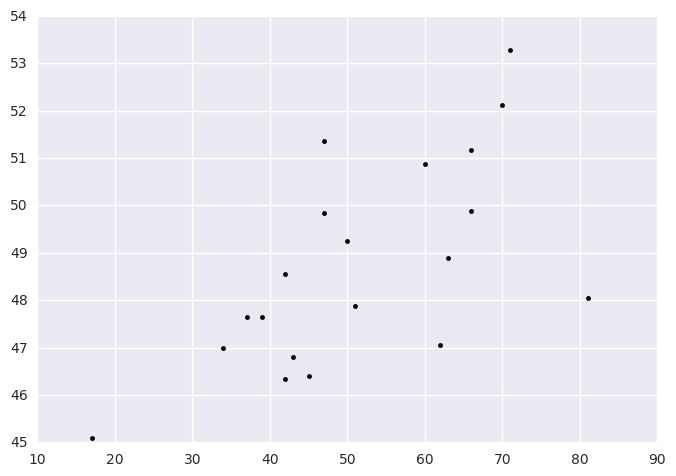

In [84]:
y_predicted = svm_model.predict(X_test)
plt.plot(y_test, y_predicted, 'k.')

plt.show()
#plt.savefig('SVR.png', bbox_inches='tight')

In [86]:
from sklearn import metrics

print('The MSE for the model is:', metrics.mean_squared_error(y_test, svm_model.predict(X_test)))
print('The MAE for the model is:', metrics.mean_absolute_error(y_test, svm_model.predict(X_test)))

The MSE for the model is: 198.303724311
The MAE for the model is: 11.2594958716


Accuracy of model based on cross-validation evaluation: 


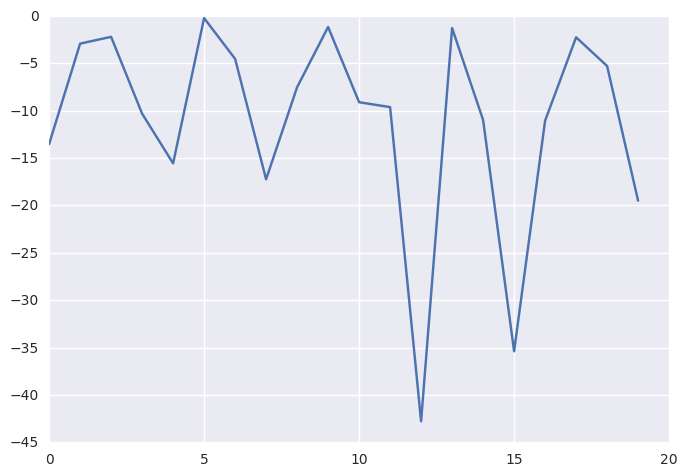

In [35]:
from sklearn import cross_validation

print("Accuracy of model based on cross-validation evaluation: ")
# Train the SVR with the training datasets and calculate accuracy using cross-validation
plt.plot(cross_validation.cross_val_score(estimator=svm_model, X=X, y=y, cv=20))
plt.show()

Conclusion: model does not perform well

# Parameters selection

In [48]:
# Parameter selection
from sklearn import grid_search
#from sklearn.model_selection import GridSearchCV

SVR = svm.SVR()

parameters = {'shrinking':[0, 1],
              'C':[1e0, 1e1, 1e2, 1e3],
              'epsilon':[0, 0.01, 0.1, 0.5, 1, 2, 4],
              'degree':[2,3,4],
              'gamma': np.logspace(-2, 2, 5)}
clf = grid_search.GridSearchCV(SVR, parameters, cv=10)
clf.fit(X, y)
best = clf.best_params_

#print('The best "kernel" parameter for the model: ', best['kernal'])
print('The best "shrinking" parameter for the model: ', best['shrinking'])
print('The best "C" parameter for the model: ', best['C'])
print('The best "epsilon" parameter for the model: ', best['epsilon'])
print('The best "degree" parameter for the model: ', best['degree'])
print('The best "gamma" parameter for the model: ', best['gamma'])

The best "shrinking" parameter for the model:  0
The best "C" parameter for the model:  1.0
The best "epsilon" parameter for the model:  0
The best "degree" parameter for the model:  2
The best "gamma" parameter for the model:  10.0


In [52]:
SVR = svm.SVR(shrinking = 0,
             C = 1.0,
             epsilon = 0,
             degree = 2,
             gamma = 10.0)
SVR.fit(X, y)
print('The MSE for the model is:', metrics.mean_squared_error(y_test, SVR.predict(X_test)))
print('The MAE for the model is:', metrics.mean_absolute_error(y_test, SVR.predict(X_test)))

The MSE for the model is: 244.488521527
The MAE for the model is: 12.3499999992


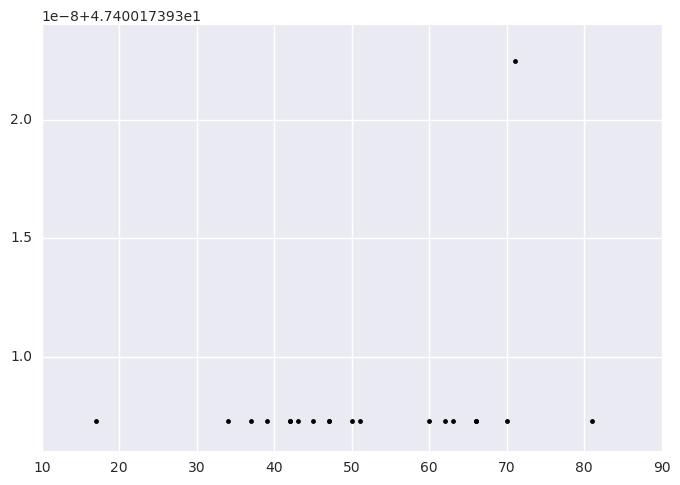

In [54]:
y_predicted = SVR.predict(X_test)
plt.plot(y_test, y_predicted, 'k.')
plt.show()

Accuracy of model based on cross-validation evaluation: 


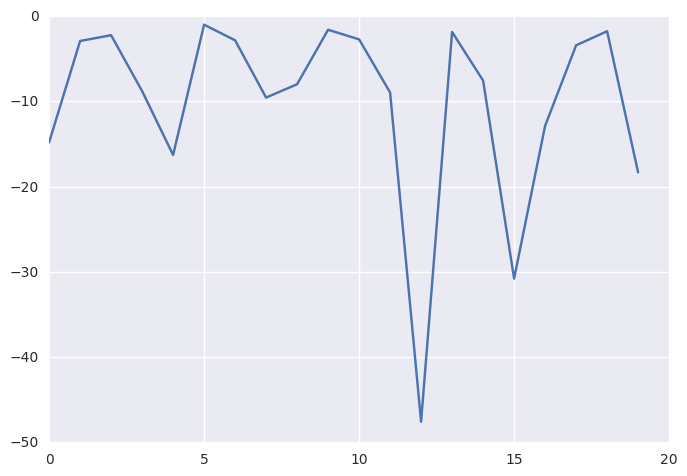

In [51]:
from sklearn import cross_validation

print("Accuracy of model based on cross-validation evaluation: ")
# Train the SVR with the training datasets and calculate accuracy using cross-validation
plt.plot(cross_validation.cross_val_score(estimator=SVR, X=X, y=y, cv=20))
plt.show()

Conclusion: GridSearchCV alone does not improve model

# Dimensionality reduction

In [20]:
# Do feature selection and dimensionality reduction

import seaborn as sns
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.model_selection

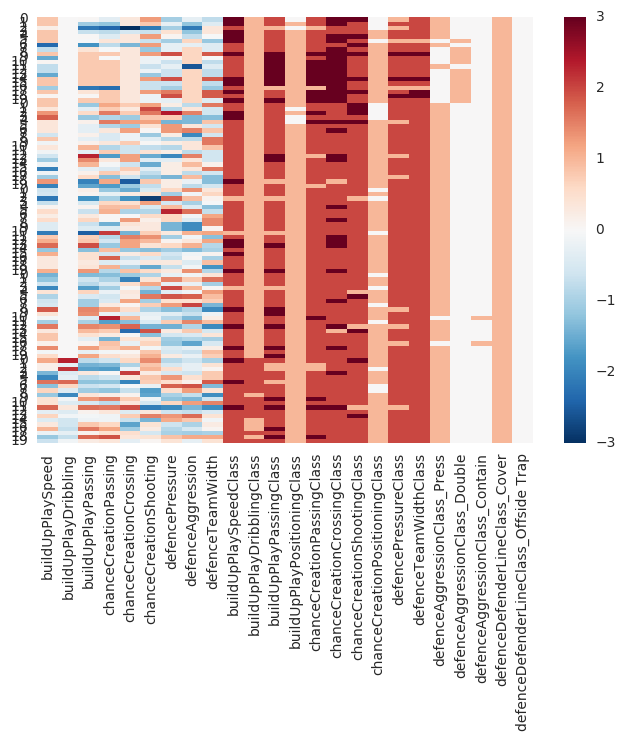

In [83]:
# Visualize the high-dimensional data

sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()
#plt.savefig('X.png', bbox_inches='tight')

In [76]:
# Principal Component Analysis
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
# Determine which attributes are more variant
exp_var_1 = pca.explained_variance_
exp_var_1

array([  2.46846848e+00,   1.83564829e+00,   1.28324780e+00,
         9.11674609e-01,   8.77224970e-01,   7.29437291e-01,
         4.91840555e-01,   3.34582396e-01,   3.10962446e-01,
         1.79616617e-01,   1.28276573e-01,   1.05793756e-01,
         8.48828892e-02,   7.82359750e-02,   7.41381921e-02,
         6.24536647e-02,   5.26369357e-02,   4.49421069e-02,
         2.77948162e-02,   2.18138418e-02,   1.54277985e-02,
         6.27308548e-33,   0.00000000e+00,   0.00000000e+00])

In [78]:
# Rank the highest explained variances

exp_var = pca.explained_variance_
exp_var.sort()
exp_var = exp_var[::-1]
exp_var

array([  2.46846848e+00,   1.83564829e+00,   1.28324780e+00,
         9.11674609e-01,   8.77224970e-01,   7.29437291e-01,
         4.91840555e-01,   3.34582396e-01,   3.10962446e-01,
         1.79616617e-01,   1.28276573e-01,   1.05793756e-01,
         8.48828892e-02,   7.82359750e-02,   7.41381921e-02,
         6.24536647e-02,   5.26369357e-02,   4.49421069e-02,
         2.77948162e-02,   2.18138418e-02,   1.54277985e-02,
         6.27308548e-33,   0.00000000e+00,   0.00000000e+00])

In [73]:
# Create a pipeline to find the optimal PCA n_components and SVR parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = sklearn.decomposition.PCA()
svr = svm.SVR()
pipe = Pipeline(steps=[('pca', pca), ('svr', svr)])

# Parameters to be tested
n_components = list(range(5,24))
gamma = np.logspace(-2, 2, 5)
C = [1e0, 1e1, 1e2, 1e3]
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4]

estimator = GridSearchCV(pipe,
                         dict(pca__n_components = n_components,
                              svr__gamma = gamma,
                              svr__C = C,
                              svr__epsilon = epsilon))
estimator.fit(X, y)

est_best = estimator.best_params_
print('The best number of n_components for PCA:', estimator.best_estimator_.named_steps['pca'].n_components)
print('The best gamma for SVR:', estimator.best_estimator_.named_steps['svr'].gamma)
print('The best C for SVR:', estimator.best_estimator_.named_steps['svr'].C)
print('The best epsilon for SVR:', estimator.best_estimator_.named_steps['svr'].epsilon)

The best number of n_components for PCA: 7
The best gamma for SVR: 0.1
The best C for SVR: 10.0
The best epsilon for SVR: 4


In [62]:
pca.n_components = 7

X_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

print(X_pca.shape, X_test_pca.shape)

(100, 7) (20, 7)


In [63]:
SVR = svm.SVR(gamma = 0.1, C = 10, epsilon = 4)
SVR.fit(X_pca, y)

print('The MSE for the model is:', metrics.mean_squared_error(y_test, SVR.predict(X_test_pca)))
print('The MAE for the model is:', metrics.mean_absolute_error(y_test, SVR.predict(X_test_pca)))

The MSE for the model is: 187.629870478
The MAE for the model is: 10.9332484682


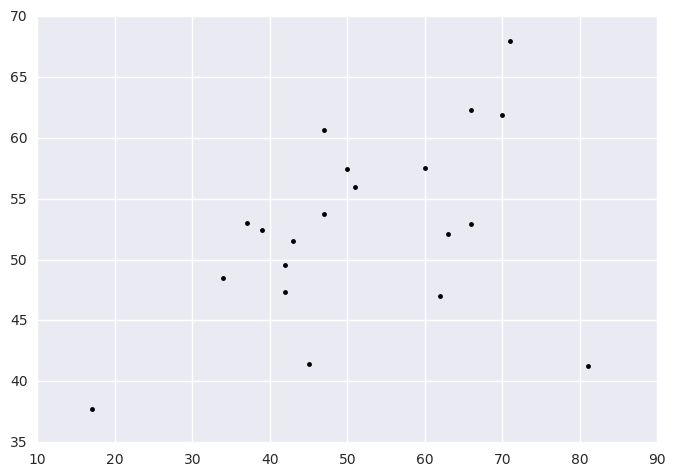

In [85]:
y_predicted = SVR.predict(X_test_pca)
plt.plot(y_test, y_predicted, 'k.')
plt.show()
#plt.savefig('SVR-PCA.png', bbox_inches='tight')

Accuracy of model based on cross-validation evaluation: 


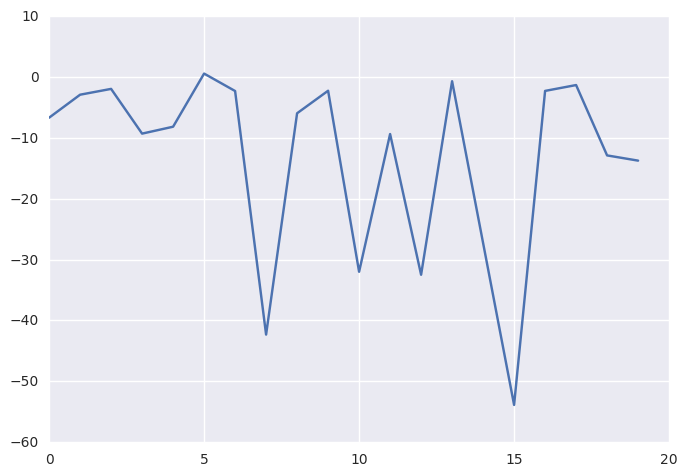

In [41]:
from sklearn import cross_validation

print("Accuracy of model based on cross-validation evaluation: ")
# Train the SVR with the training datasets and calculate accuracy using cross-validation
plt.plot(cross_validation.cross_val_score(estimator=SVR, X=X_pca, y=y, cv=20))
plt.show()

Conclusion: PCA slightly improves the model

# Feature Selection

/Users/justinchang/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Number of features corresponding to max CV score : 6


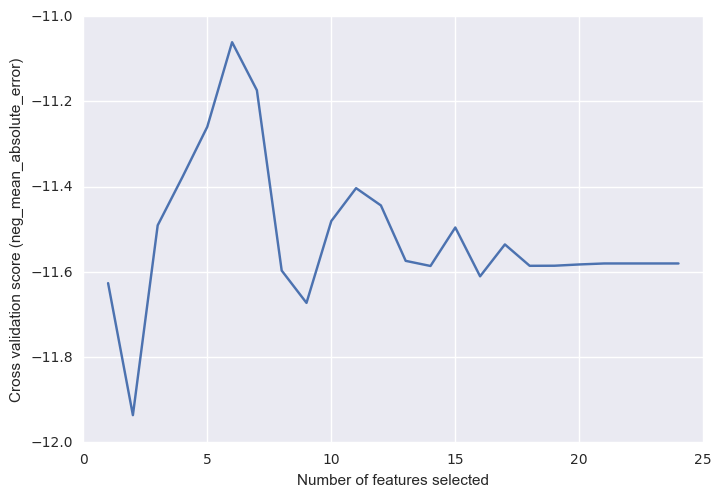

In [65]:
# Create the RFE object and compute a cross-validated score.
# RFE only works with linear kernel in SVR

svr = svm.SVR(kernel="linear")
rfecv = sklearn.feature_selection.RFECV(estimator=svr,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(3),
                                        scoring='neg_mean_absolute_error')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg_mean_absolute_error)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [66]:
print('The MSE for the model is:', metrics.mean_squared_error(y_test, rfecv.predict(X_test)))
print('The MAE for the model is:', metrics.mean_absolute_error(y_test, rfecv.predict(X_test)))

The MSE for the model is: 194.982632912
The MAE for the model is: 10.1967638578


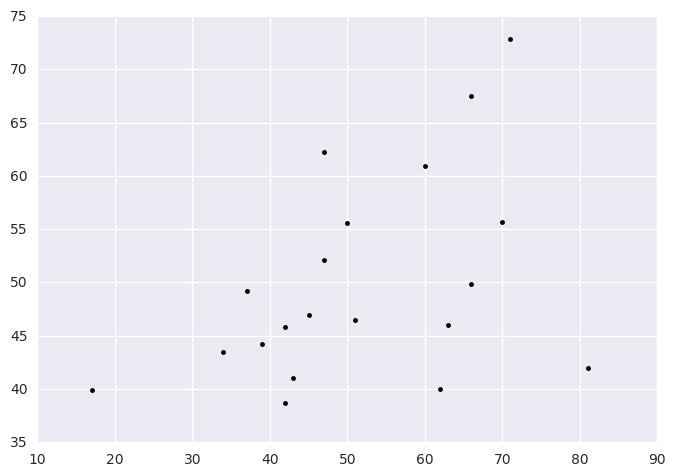

In [67]:
y_predicted = rfecv.predict(X_test)
plt.plot(y_test, y_predicted, 'k.')
plt.show()

Conclusion: RFE feature selection with linear-kernel does not improve the model